# EDA
---

### Notes about the EDA and results
---

### Initialization and data import

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

In [2]:
# Load data
df_wertheim_2024 = pd.read_parquet("data/fueldata/wertheim_23-25.parquet")
#df_wertheim_2024 = pd.read_parquet("data/fueldata/fuerstenwalde_23-25.parquet")
#df_wertheim_2024 = pd.read_csv("data/fueldata/fuerstenwalde_2024.csv")

df_oil = pd.read_excel("data/oildata/rbrted.xls","Data 1")

In [3]:
df_oil.tail(20)

,Back to Contents,Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)
9623,2025-04-17 00:00:00,69.33
9624,2025-04-22 00:00:00,68.93
9625,2025-04-23 00:00:00,68.26
9626,2025-04-24 00:00:00,67.5
9627,2025-04-25 00:00:00,66.99
9628,2025-04-28 00:00:00,66.13
9629,2025-04-29 00:00:00,64.04
9630,2025-04-30 00:00:00,63.37
9631,2025-05-01 00:00:00,62.37
9632,2025-05-02 00:00:00,61.57


---
### Data Description

In [4]:
df_wertheim_2024.tail()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
116485,2025-05-25 21:09:18+02,bb61cff1-0d73-4189-847e-82b8599418d5,1.529,1.739,1.679,1,1,1,Esso Tankstelle,ESSO,BLAETTLEINSAECKER 1,,97877,WERTHEIM,49.771156,9.575148,2014-03-18 16:45:31+01,{}
116486,2025-05-25 21:16:23+02,fb0f8030-c1eb-4df1-9410-054eea7422ad,1.479,1.679,1.619,1,1,1,Aral Tankstelle,ARAL,Bestenheider Landstraße,70,97877,Wertheim,49.781710,9.504071,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":64,""period..."
116487,2025-05-25 23:01:57+02,fb0f8030-c1eb-4df1-9410-054eea7422ad,1.519,1.719,1.659,1,1,1,Aral Tankstelle,ARAL,Bestenheider Landstraße,70,97877,Wertheim,49.781710,9.504071,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":64,""period..."
116488,2025-05-25 23:06:02+02,bb61cff1-0d73-4189-847e-82b8599418d5,1.609,1.819,1.759,1,1,1,Esso Tankstelle,ESSO,BLAETTLEINSAECKER 1,,97877,WERTHEIM,49.771156,9.575148,2014-03-18 16:45:31+01,{}
116489,2025-05-25 23:36:30+02,e7a53db3-ebdf-4e07-9e53-ab5f19cf84e7,1.529,1.699,1.649,1,1,1,ZG Raiffeisen/Honeck-Waldschütz Tankstelle Wer...,ZG Raiffeisen Energie,Hafenstraße,12,97877,Wertheim-Bestenheid,49.781240,9.476310,2018-01-10 23:30:06+01,{}


In [18]:
print("Number of distinct gas stations:",df_wertheim_2024["name"].nunique())
print("Different gas stations:")
for gas in df_wertheim_2024["name"].unique():
    print (" - ",gas)

Number of distinct gas stations: 9
Different gas stations:
 -  TotalEnergies Truckstop Wertheim
 -  Esso Tankstelle
 -  Tankstelle Wertheim
 -  Berliner Ring
 -  Aral Tankstelle
 -  bft - Walther
 -  ZG Raiffeisen/Honeck-Waldschütz Tankstelle Wertheim
 -  Philipp Diehm GmbH
 -  Graf Wertheim 2


In [19]:
# Missing values
df_wertheim_2024.isna().sum()

date                 0
station_uuid         0
diesel               0
e5                   0
e10                  0
dieselchange         0
e5change             0
e10change            0
name                 0
brand                0
street               0
house_number         0
post_code            0
city                 0
latitude             0
longitude            0
first_active         0
openingtimes_json    0
dtype: int64

---
### Pre-Processing

In [20]:
# Make date variable numeric
df_wertheim_2024.dropna(inplace=True)
df_wertheim_2024["datetime"] = df_wertheim_2024["date"].apply(lambda x: datetime.strptime(x.split("+")[0], "%Y-%m-%d %H:%M:%S"))
df_wertheim_2024["datedate"] = df_wertheim_2024["datetime"].dt.date
df_wertheim_2024["hour"] = df_wertheim_2024["datetime"].dt.hour

In [21]:
# Oildata preparation
df_oil.columns = ["date","price"]
# Remove first two rows which include additional information
df_oil = df_oil.iloc[2:]
# Create datetime and oilprice variable
df_oil["datetime"] = pd.to_datetime(df_oil["date"], format='%Y-%m-%d')
df_oil["oilprice"] = df_oil["price"].astype(float)
df_oil.drop(["price","date"],axis=1,inplace=True)
df_oil.head()

,datetime,oilprice
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63


In [22]:
# Save oil dataset
df_oil.to_parquet("data/oildata/oilprices.parquet")

---
### Visualizations

<Axes: xlabel='datetime', ylabel='e5'>

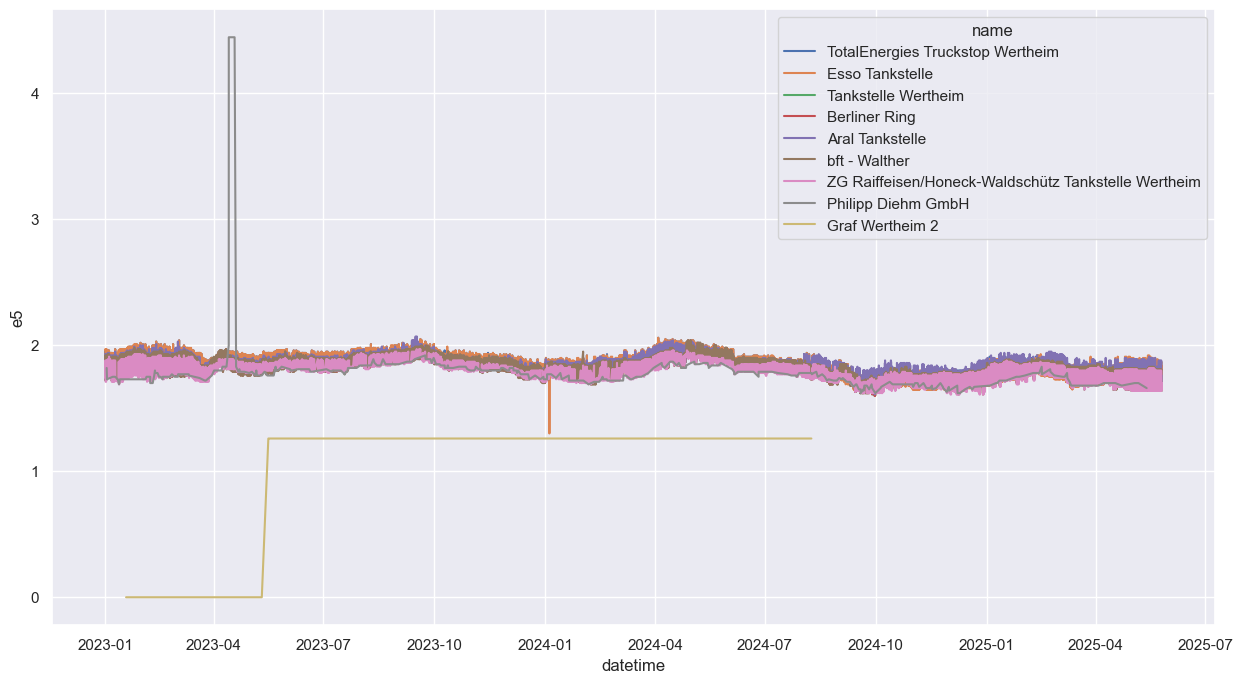

In [23]:
# Price change over the year by gas station
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datetime", y="e5", hue="name")

<Axes: xlabel='datedate', ylabel='e5'>

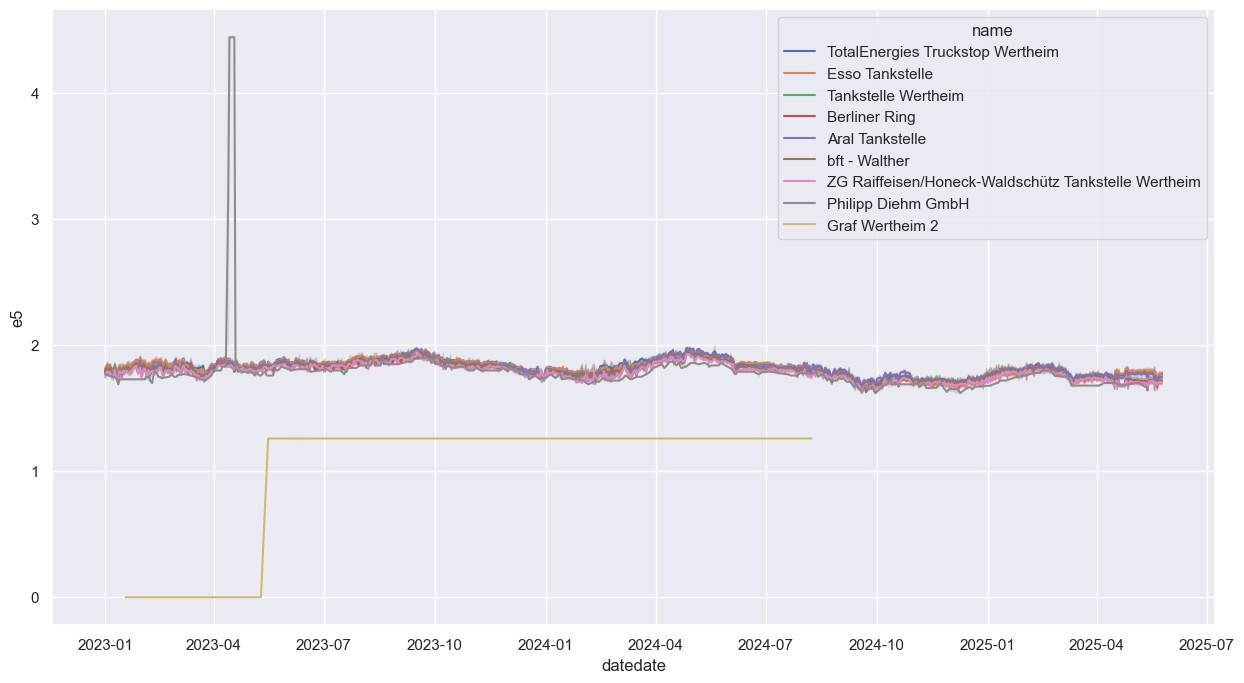

In [24]:
# Price change over the year by gas station and day
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5", hue="name")

<Axes: xlabel='datedate', ylabel='e5'>

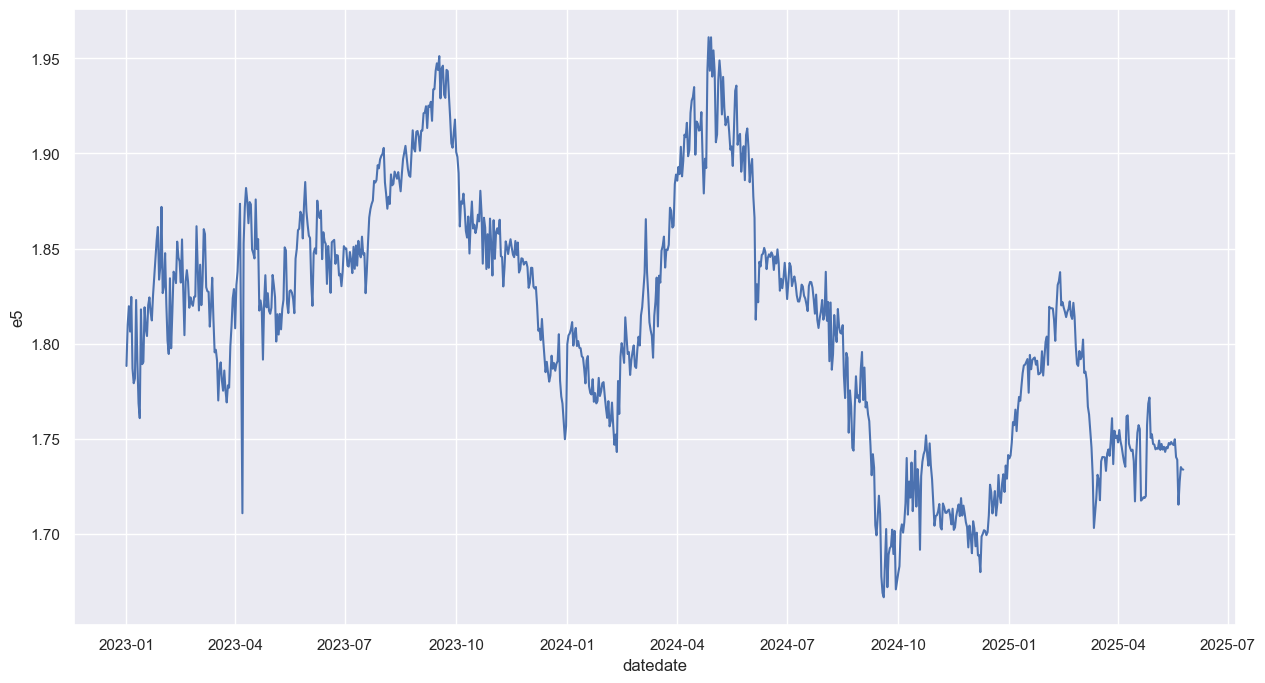

In [25]:
# Price change over the year by day
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5",errorbar=None)

(1.5, 2.0)

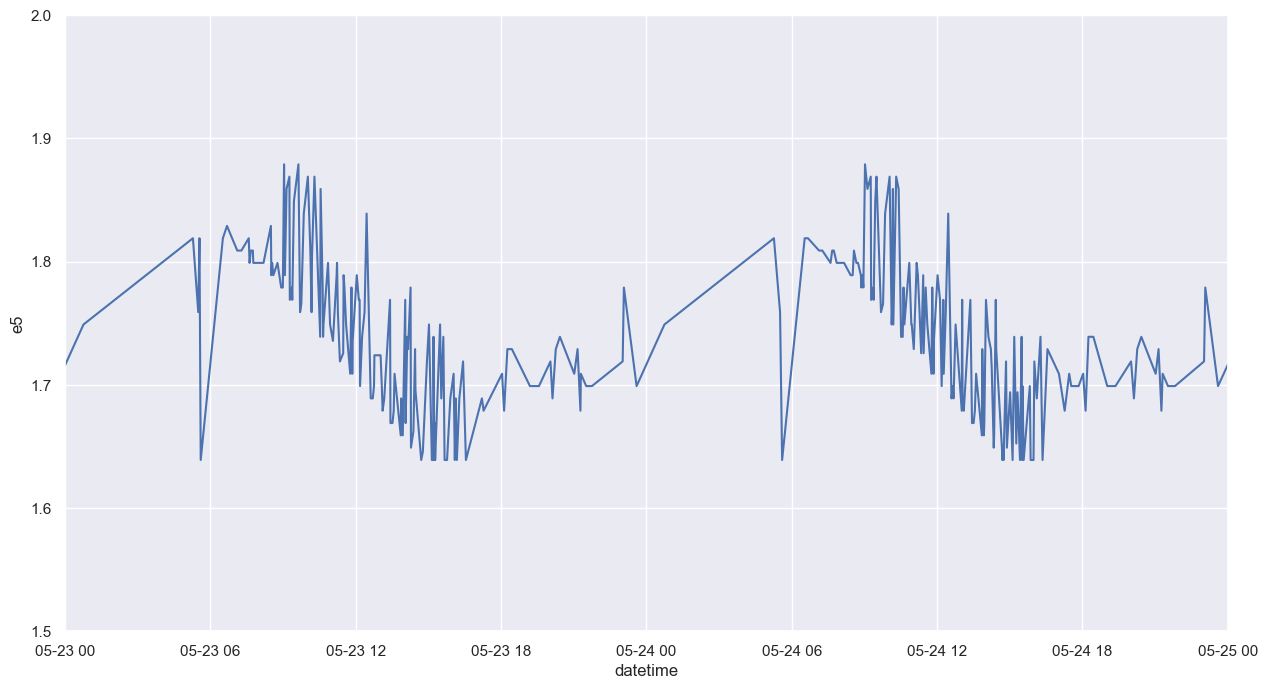

In [31]:
# Price change over the year by day
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datetime", y="e5",errorbar=None)
plt.xlim((pd.to_datetime("2025-05-23"),pd.to_datetime("2025-05-25")))
plt.ylim((1.5,2))

<Axes: xlabel='datedate', ylabel='e5'>

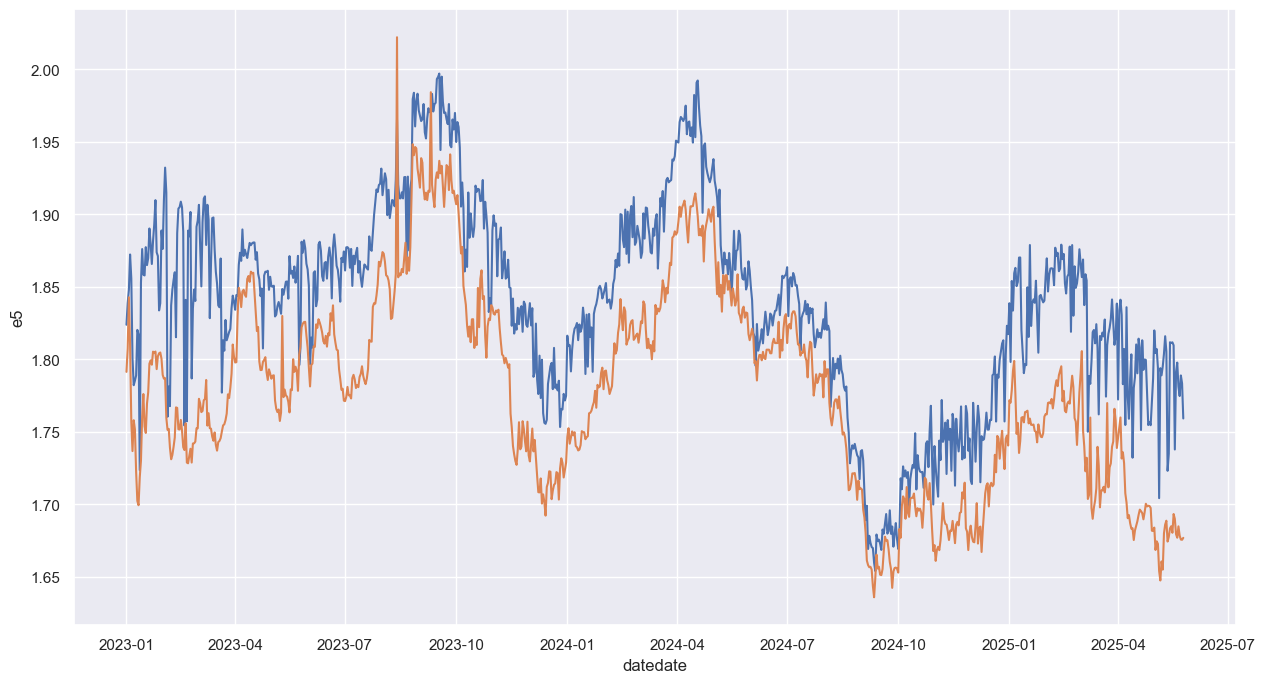

In [14]:
# Price over the day by hour
sns.lineplot(data=df_wertheim_2024[(6 <= df_wertheim_2024["hour"]) & (df_wertheim_2024["hour"] <= 11)], x="datedate", y="e5",errorbar=None)
sns.lineplot(data=df_wertheim_2024[(18 <= df_wertheim_2024["hour"]) & (df_wertheim_2024["hour"] <= 22)], x="datedate", y="e5",errorbar=None)

<Axes: xlabel='datedate', ylabel='e5'>

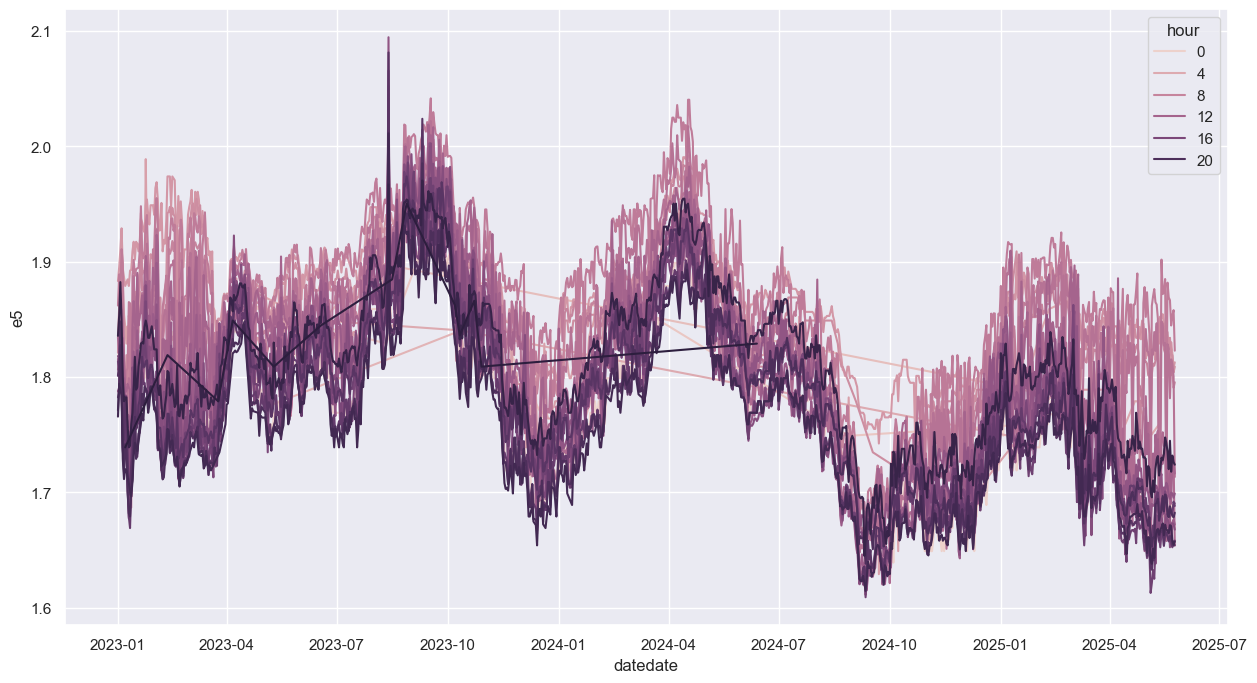

In [15]:
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5",errorbar=None,hue="hour")

(19358.0, 20238.0)

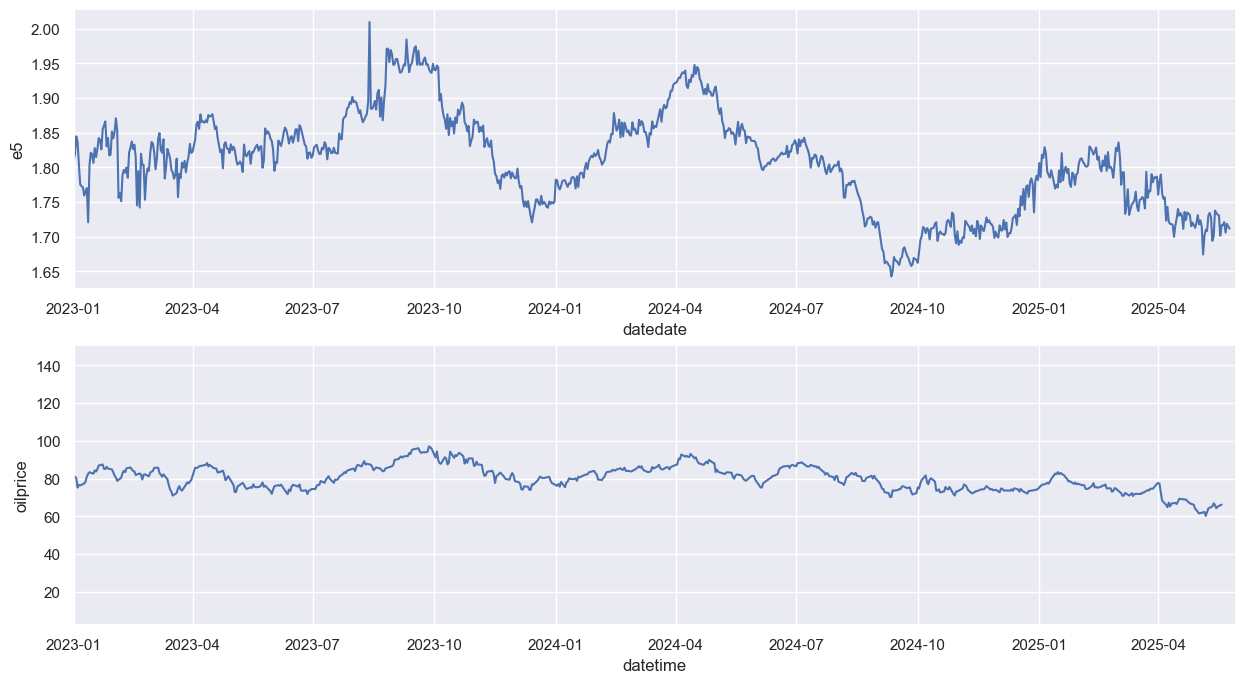

In [16]:
# Price change over the year by day
sns.set_theme(rc={'figure.figsize':(15,8)})
plt.subplot(2,1,1)
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5",errorbar=None)
plt.xlim(left=pd.to_datetime("2023-01-01"))
plt.xlim(right=pd.to_datetime("2025-05-30"))
plt.subplot(2,1,2)
sns.lineplot(data=df_oil, x="datetime", y="oilprice",errorbar=None)
plt.xlim(left=pd.to_datetime("2023-01-01"))
plt.xlim(right=pd.to_datetime("2025-05-30"))

In [17]:
from prophet import Prophet

model = Prophet(daily_seasonality=True, weekly_seasonality=True)
df_wertheim_2024.rename(columns={"datetime": "ds", "e5": "y"}, inplace=True)
model.fit(df_wertheim_2024)

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
09:19:35 - cmdstanpy - INFO - Chain [1] start processing
09:20:47 - cmdstanpy - INFO - Chain [1] done processing


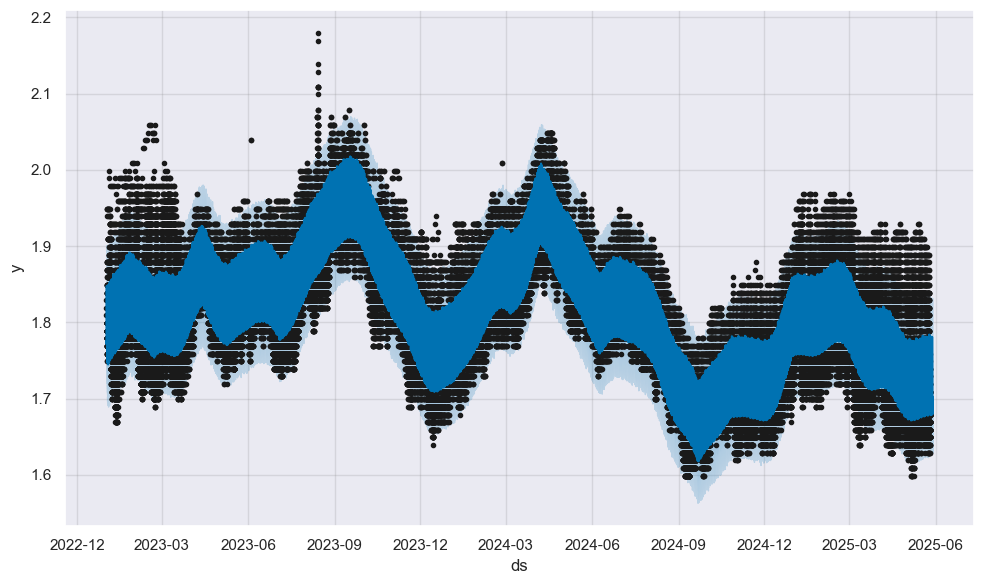

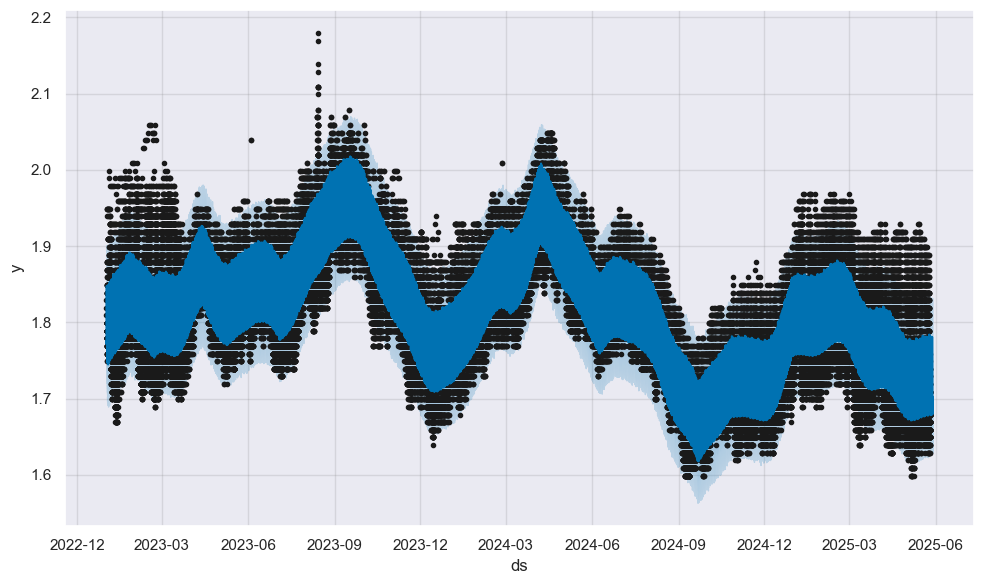

In [31]:
future = model.make_future_dataframe(periods=72, freq='H')
forecast = model.predict(future)

# Plot
model.plot(forecast)

<Axes: xlabel='ds', ylabel='yhat'>

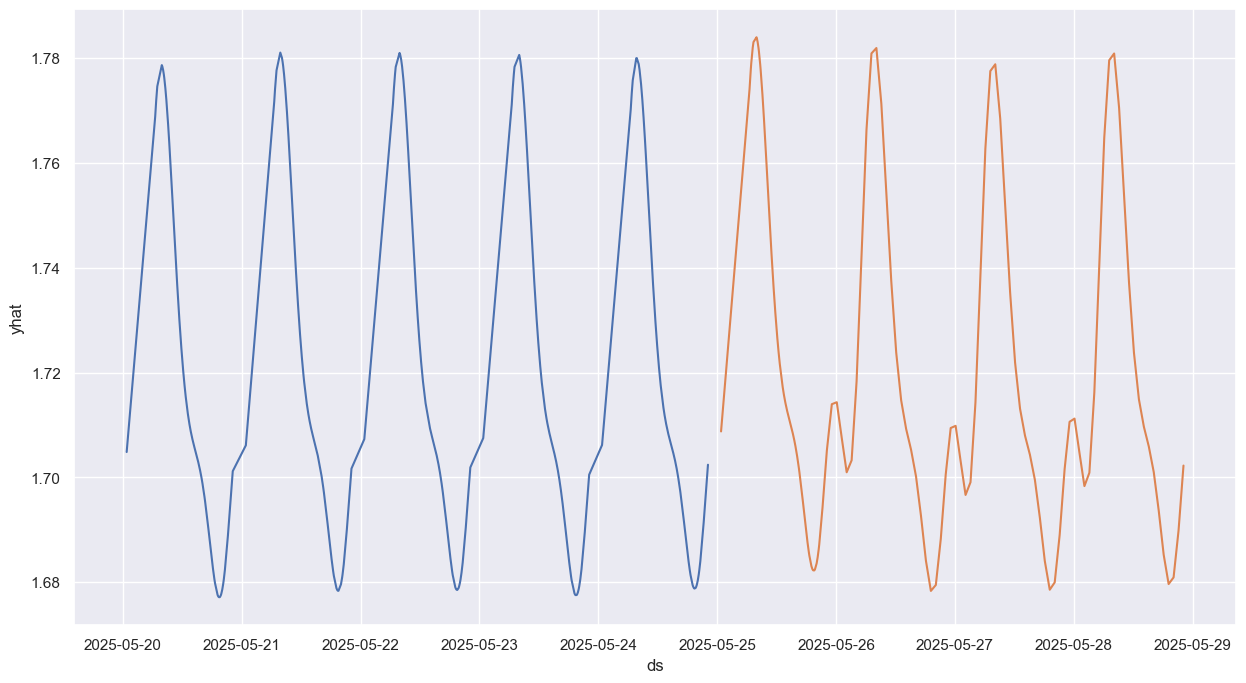

In [ ]:
sns.lineplot(forecast[(forecast["ds"]>pd.to_datetime("2025-05-20")) & (forecast["ds"]<=pd.to_datetime("2025-05-25"))],x="ds",y="yhat")
sns.lineplot(forecast[forecast["ds"]>pd.to_datetime("2025-05-25")],x="ds",y="yhat")

In [22]:
df_wertheim_2024.tail()

,station_uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,...,date,diesel,y,e10,dieselchange,e5change,e10change,ds,datedate,hour
188072,8f0412d2-df04-4eef-86e3-132ed6c8238a,AGRAVIS Ost GmbH & Co. KG,Raiffeisen,Lindenstr.,59,15517,Fürstenwalde,52.3548,14.0865,2018-06-21 23:30:06+02,...,2025-05-25 20:10:24+02,1.519,1.659,1.629,0.0,1.0,0.0,2025-05-25 20:10:24,2025-05-25,20
188073,8f0412d2-df04-4eef-86e3-132ed6c8238a,AGRAVIS Ost GmbH & Co. KG,Raiffeisen,Lindenstr.,59,15517,Fürstenwalde,52.3548,14.0865,2018-06-21 23:30:06+02,...,2025-05-25 20:22:36+02,1.559,1.669,1.629,1.0,1.0,0.0,2025-05-25 20:22:36,2025-05-25,20
188074,8f0412d2-df04-4eef-86e3-132ed6c8238a,AGRAVIS Ost GmbH & Co. KG,Raiffeisen,Lindenstr.,59,15517,Fürstenwalde,52.3548,14.0865,2018-06-21 23:30:06+02,...,2025-05-25 21:15:22+02,1.519,1.659,1.629,1.0,1.0,0.0,2025-05-25 21:15:22,2025-05-25,21
188075,8f0412d2-df04-4eef-86e3-132ed6c8238a,AGRAVIS Ost GmbH & Co. KG,Raiffeisen,Lindenstr.,59,15517,Fürstenwalde,52.3548,14.0865,2018-06-21 23:30:06+02,...,2025-05-25 22:05:06+02,1.559,1.669,1.629,1.0,1.0,0.0,2025-05-25 22:05:06,2025-05-25,22
188076,8f0412d2-df04-4eef-86e3-132ed6c8238a,AGRAVIS Ost GmbH & Co. KG,Raiffeisen,Lindenstr.,59,15517,Fürstenwalde,52.3548,14.0865,2018-06-21 23:30:06+02,...,2025-05-25 22:08:08+02,1.629,1.749,1.689,1.0,1.0,1.0,2025-05-25 22:08:08,2025-05-25,22
